# 텍스트 마이닝 3 - 자연어 텍스트 처리 (NLTK & KoNLPy) 

<div align='center'>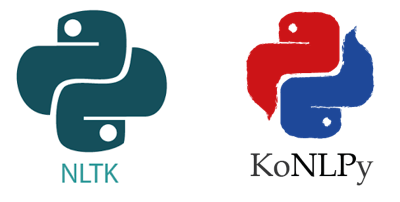</div>

### 코랩: 한글 폰트 설치

1.한글 폰트 설치

In [ ]:
#폰트 설치
! apt install fonts-nanum*

In [ ]:
! apt install fontconfig

2. 폰트 캐시 생성

In [ ]:
#폰트 캐시 생성
!fc-cache -fv

3. matplotlib에 남아있는 font 캐시 삭제

In [ ]:
# matplotlib에 남아있는 font 캐시 삭제
!rm -rf ~/.cache/matplotlib/*

4. Runtime 재실행

In [1]:
import matplotlib.font_manager as fm
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

Text(0.5, 1.0, '한글 테스트')

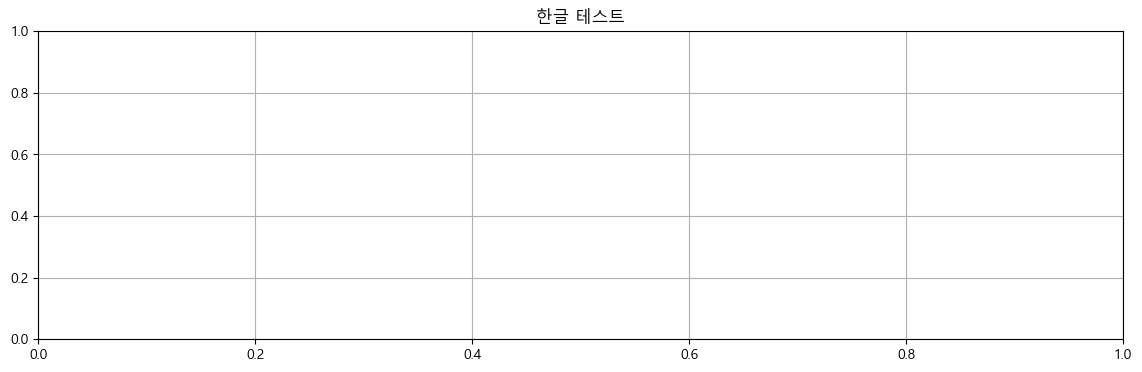

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

font_path = "C:/Windows/Fonts/Malgun.ttf"
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = fontname
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글 테스트')

# NLTK

NLTK(Natural Language Toolkit): 자연어 처리 및 문서 분석용 패키지
1. 말뭉치
2. 토큰 생성
3. 형태소 분석
4. 품사 태깅

NLTK 설치

In [5]:
! pip install nltk

     ---------------------------------------- 1.5/1.5 MB 31.6 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB ? eta 0:00:00
     ------------------------------------- 267.8/267.8 kB 16.1 MB/s eta 0:00:00


## 1. NLTK 코퍼스 (nltk.corpus 모듈)
http://www.nltk.org/nltk_data/ (전체목록)

주요 코퍼스
* gutenberg : 모비딕(Moby Dick), 성서등 구텐베르크 프로젝트 영문 책 텍스트 18개
* reuters: 10,788 뉴스 문서, 천3백만 단어, 90개 토픽, "training" 과 "test"로 나누어져 있다. 
* brown : 브라운대(1961) 최초 백만단어 코퍼스, 뉴스 학습자료등 카테고리가 나누어져 있다
* names : 8,000개의 남성과 여성의 이름
* words : 가장 빈번하게 사용하는 영어 단어 23,5000개
* stopwords : 14개의 언어의 가장 많이 사용하는 불용어(stop word)
* cmudict : 카네기멜론대, 13,4000개 단어와 그 음절(syllables)로 구성. 동음이의어(homophones) 검색.

In [6]:
import nltk

nltk.download("gutenberg")
nltk.download("reuters")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet') 

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...


True

In [7]:
# 제공되는 텍스트 문서 확인
import nltk
fileids = nltk.corpus.gutenberg.fileids()
print(fileids)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


* corpus.fileids() # 코퍼스에 포함된 파일아이디 목록
* corpus.raw(fileid) # 파일의 원문
* corpus.sents(fileid) #파일의 문장 목록
* corpus.words(fileid) # 파일의 단어 목록

In [ ]:
from nltk.corpus import gutenberg

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) # 문자수
    num_words = len(gutenberg.words(fileid)) # 단어수
    num_sents = len(gutenberg.sents(fileid)) # 문장수
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid))) # 어휘수
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

### 말뭉치 문서 읽기

In [8]:
import nltk
from nltk.corpus import gutenberg

In [9]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
# 1. read document
moby_dick_text = gutenberg.open('melville-moby_dick.txt').read()
moby_dick_text[:1000]

'[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY.\r\n\r\n(Supplied by a Late Consumptive Usher to a Grammar School)\r\n\r\nThe pale Usher--threadbare in coat, heart, body, and brain; I see him\r\nnow.  He was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.  He loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.\r\n\r\n"While you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter H, which almost alone maketh the signification\r\nof the word, you deliver that which is not true." --HACKLUYT\r\n\r\n"WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness\r\nor rolling; for in Dan. HVALT is arched or vaulted." --WEBSTER\'S\r\nDICTIONARY\r\n\r\n"WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;\r\nA.S. WALW-IAN, t

In [11]:
type(moby_dick_text)

str

In [12]:
moby_dick_text.split(' ')

['[Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851]\r\n\r\n\r\nETYMOLOGY.\r\n\r\n(Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School)\r\n\r\nThe',
 'pale',
 'Usher--threadbare',
 'in',
 'coat,',
 'heart,',
 'body,',
 'and',
 'brain;',
 'I',
 'see',
 'him\r\nnow.',
 '',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars,',
 'with',
 'a',
 'queer\r\nhandkerchief,',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the\r\nknown',
 'nations',
 'of',
 'the',
 'world.',
 '',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars;',
 'it\r\nsomehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality.\r\n\r\n"While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others,',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what\r\nname',
 'a',
 'whale-fish',
 'is',
 'to',
 'be',
 'called',
 'in',
 'our',
 'tongue',
 'leaving',
 'out,',
 'through\r\nignorance,',
 

## 2. 토큰 생성 Toknize

텍스트를 처리하기 위한 작은 단위(token)으로 나눈다. NLTK는 다음 토큰 생성을 제공

```python
from nltk.tokenize import sent_tokenize # 문장으로 나누기
from nltk.tokenize import word_tokenize # 단어로 나누기 
from nltk.tokenize import regexp_tokenize # 정규식으로 나누기
```

In [14]:
from nltk.tokenize import sent_tokenize  # 문장

moby_sents = sent_tokenize(moby_dick_text)
moby_sents[:110]

['[Moby Dick by Herman Melville 1851]\r\n\r\n\r\nETYMOLOGY.',
 '(Supplied by a Late Consumptive Usher to a Grammar School)\r\n\r\nThe pale Usher--threadbare in coat, heart, body, and brain; I see him\r\nnow.',
 'He was ever dusting his old lexicons and grammars, with a queer\r\nhandkerchief, mockingly embellished with all the gay flags of all the\r\nknown nations of the world.',
 'He loved to dust his old grammars; it\r\nsomehow mildly reminded him of his mortality.',
 '"While you take in hand to school others, and to teach them by what\r\nname a whale-fish is to be called in our tongue leaving out, through\r\nignorance, the letter H, which almost alone maketh the signification\r\nof the word, you deliver that which is not true."',
 '--HACKLUYT\r\n\r\n"WHALE.',
 '... Sw. and Dan.',
 'HVAL.',
 'This animal is named from roundness\r\nor rolling; for in Dan.',
 'HVALT is arched or vaulted."',
 '--WEBSTER\'S\r\nDICTIONARY\r\n\r\n"WHALE.',
 '...',
 'It is more immediately from the Dut.',
 '

In [15]:
from nltk.tokenize import word_tokenize   # 단어

moby_words = word_tokenize(moby_dick_text)
moby_words[:110]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.',
 '(',
 'Supplied',
 'by',
 'a',
 'Late',
 'Consumptive',
 'Usher',
 'to',
 'a',
 'Grammar',
 'School',
 ')',
 'The',
 'pale',
 'Usher',
 '--',
 'threadbare',
 'in',
 'coat',
 ',',
 'heart',
 ',',
 'body',
 ',',
 'and',
 'brain',
 ';',
 'I',
 'see',
 'him',
 'now',
 '.',
 'He',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 ',',
 'with',
 'a',
 'queer',
 'handkerchief',
 ',',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 '.',
 'He',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 ';',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 '.',
 '``',
 'While',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 ',',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale-fish',
 'is']

In [16]:
len(moby_words)

255028

In [19]:
from nltk import regexp_tokenize

moby_retoks = regexp_tokenize(moby_dick_text.lower(), r"[\w]+")   # 소문자로 일괄적으로 변경한 후  ( r"[\w]+" - 단어 )로 나눠 줌
moby_retoks[100:110]

['out',
 'through',
 'ignorance',
 'the',
 'letter',
 'h',
 'which',
 'almost',
 'alone',
 'maketh']

In [20]:
moby_retoks[:110]

['moby',
 'dick',
 'by',
 'herman',
 'melville',
 '1851',
 'etymology',
 'supplied',
 'by',
 'a',
 'late',
 'consumptive',
 'usher',
 'to',
 'a',
 'grammar',
 'school',
 'the',
 'pale',
 'usher',
 'threadbare',
 'in',
 'coat',
 'heart',
 'body',
 'and',
 'brain',
 'i',
 'see',
 'him',
 'now',
 'he',
 'was',
 'ever',
 'dusting',
 'his',
 'old',
 'lexicons',
 'and',
 'grammars',
 'with',
 'a',
 'queer',
 'handkerchief',
 'mockingly',
 'embellished',
 'with',
 'all',
 'the',
 'gay',
 'flags',
 'of',
 'all',
 'the',
 'known',
 'nations',
 'of',
 'the',
 'world',
 'he',
 'loved',
 'to',
 'dust',
 'his',
 'old',
 'grammars',
 'it',
 'somehow',
 'mildly',
 'reminded',
 'him',
 'of',
 'his',
 'mortality',
 'while',
 'you',
 'take',
 'in',
 'hand',
 'to',
 'school',
 'others',
 'and',
 'to',
 'teach',
 'them',
 'by',
 'what',
 'name',
 'a',
 'whale',
 'fish',
 'is',
 'to',
 'be',
 'called',
 'in',
 'our',
 'tongue',
 'leaving',
 'out',
 'through',
 'ignorance',
 'the',
 'letter',
 'h',
 'which'

In [ ]:
len(moby_retoks)

## 3. 형태소 분석

nltk.Text 클래스를 사용해서 형태소를 분석할 수 있다.

참고 http://www.nltk.org/api/nltk.html#nltk.text.Text

In [21]:
import nltk
moby = nltk.Text(moby_retoks)

In [22]:
type(moby)

nltk.text.Text

In [23]:
print(len(moby.tokens)) # 토큰 개수

218621


In [24]:
print(len(set(moby.tokens))) # 고유한 토큰 개수

17140


### 빈도 분포 FreqDist

In [25]:
freq_dist = moby.vocab() # FreqDist (빈도 분포)
print(len(freq_dist))

17140


In [26]:
print(freq_dist.most_common(50)) # 가장 많이 등장하는 50개

[('the', 14431), ('of', 6609), ('and', 6430), ('a', 4736), ('to', 4625), ('in', 4172), ('that', 3085), ('his', 2530), ('it', 2522), ('i', 2127), ('he', 1896), ('but', 1818), ('s', 1802), ('as', 1741), ('is', 1725), ('with', 1722), ('was', 1644), ('for', 1617), ('all', 1526), ('this', 1394), ('at', 1319), ('whale', 1226), ('by', 1204), ('not', 1151), ('from', 1088), ('him', 1067), ('so', 1065), ('on', 1062), ('be', 1045), ('one', 921), ('you', 894), ('there', 869), ('now', 785), ('had', 779), ('have', 768), ('or', 713), ('were', 684), ('they', 667), ('which', 648), ('like', 647), ('me', 633), ('then', 630), ('their', 620), ('what', 618), ('some', 618), ('when', 606), ('are', 598), ('an', 596), ('my', 589), ('no', 586)]


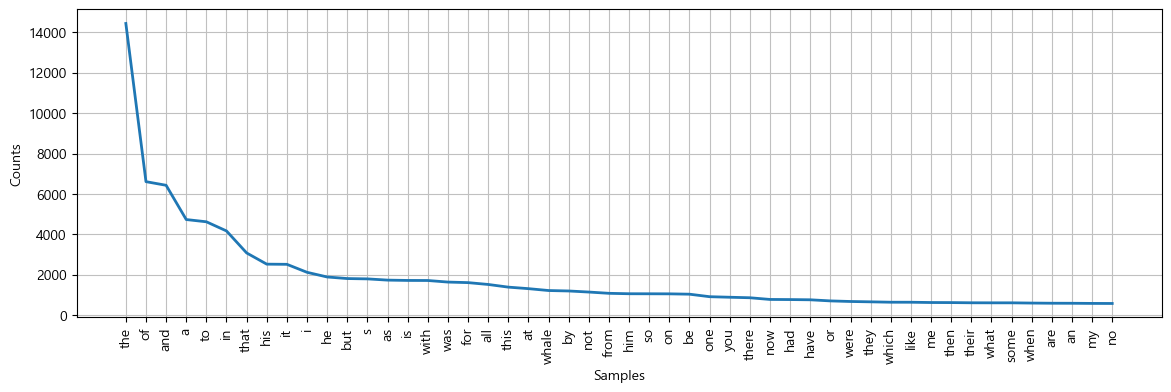

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [28]:
moby.plot(50)  # 어떤 단어가 많이 쓰이고 있는지 보여줌

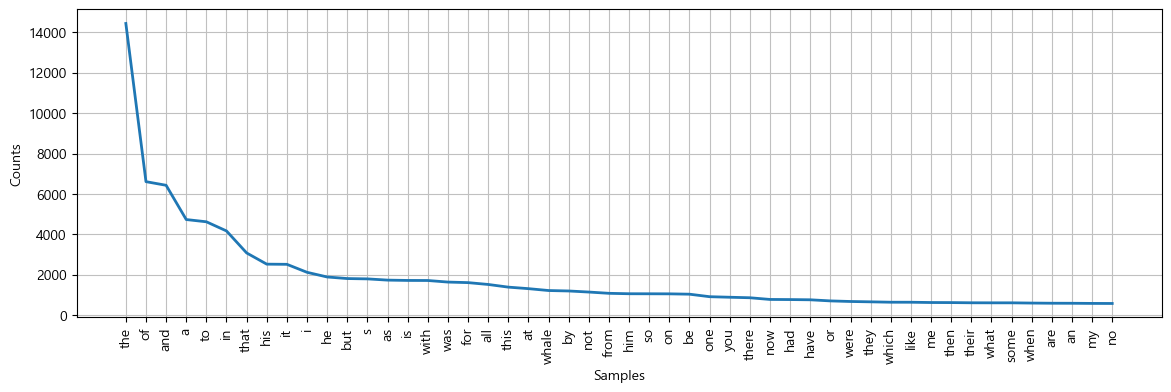

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [29]:
freq_dist.plot(50)

### count

In [31]:
moby.count('captain') # 'captain'이라는 단어가 몇번 쓰여졌는지

329

### Dispersion plot
단어가 등장하는 위치를 Word Offset에 따라 배치하여 시각화

모비딕의 주요 등장인물들: 'ahab', 'starbuck', 'queequeg', 'ishmael', 'stubb', 'flask', 'fedallah'

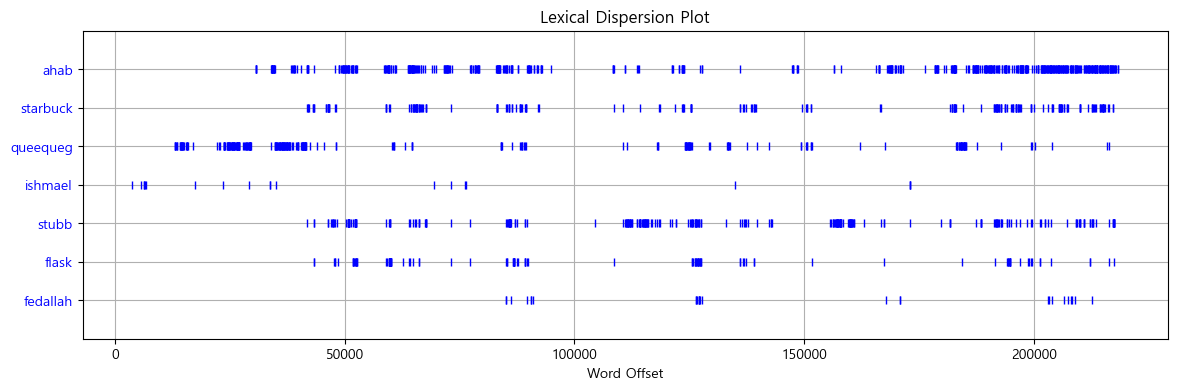

In [33]:
moby.dispersion_plot(['ahab', 'starbuck', 'queequeg', 'ishmael', 'stubb', 'flask', 'fedallah'])   # 괄호 안 단어들이 어느 위치에서 어느 정도 나오는 지

### Concordance

Concordance (색인): 단어가 쓰인 문맥을 모두 찾아준다

In [35]:
moby.concordance('man', lines=10)

Displaying 10 of 527 matches:
in civitas which is but an artificial man opening sentence of hobbes s leviatha
y of that sort that was killed by any man such is his fierceness and swiftness 
ed in his deepest reveries stand that man on his legs set his feet a going and 
h it the urbane activity with which a man receives money is really marvellous c
s and that on no account can a monied man enter heaven ah how cheerfully we con
cture truly enough to drive a nervous man distracted yet was there a sort of in
ss needle sojourning in the body of a man travelled full forty feet and at last
led him bustles a little withered old man who for their money dearly sells the 
ld put up with the half of any decent man s blanket i thought so all right take
making as much noise as the rest this man interested me at once and since the s


### Similar word

주어진 단어와 비슷한 환경(same context)에서 쓰인(≠비슷한 뜻) 단어들

In [36]:
moby.similar('whale')

ship boat sea time captain world man deck pequod other whales air
water head crew line thing side way body


In [ ]:
moby.similar('ship')

In [ ]:
moby.similar('god')

### common_contexts

for two words used in similar contexts

In [37]:
moby.common_contexts(['monstrous', 'true'])

the_pictures


### Collocations
연어(連語, collocation): 함께 위치하는 단어들 (co + location), 어휘의 조합 또는 짝을 이루는 단어

In [38]:
moby.collocations()

sperm whale; moby dick; white whale; old man; mast head; mast heads;
captain ahab; right whale; quarter deck; captain peleg; aye aye; new
bedford; try works; mrs hussey; dough boy; chief mate; cape horn;
cried ahab; years ago; thou art


## 4. 품사 태깅 PoS Tagging 
NLTK 에서는 Penn Treebank Tagset 을 이용

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

예를 들어, 
* NN: 일반명사 단수
* NNS: 일반명사 복수
* NNP: 대명사 단수
* NNPS: 대명사 복수

In [39]:
# 간단한 예제

nltk.pos_tag(['The', 'earth', 'is', 'a', 'beautiful', 'planet'])

[('The', 'DT'),
 ('earth', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('planet', 'NN')]

* DT: 한정사
* NN: 명사, 단수형
* VBZ: 동사, 현재형 시제, 3인칭 단수
* JJ: 형용사

In [40]:
# 허먼 멜빌, "모비딕" 첫 단락
# 나를 이스마엘로 불러라. 몇 년 전, 정확히 얼마나 오래 동안 그랬는지는 모르겠지만, 
# 내 지갑에 돈 한 푼 없는 빈털터리 신세에 육상에선 특별히 흥미를 끄는 어떤 것도 없던 그런 시절, 
# 나는 잠시 동안이나마 배를 타고 세계의 바다를 보고 싶다는 생각을 했다. 
# 그것이 우울하고 의기소침한 감정, 그 반복되는 악순환의 고리를 끊어버리는 한 방법이었다.

moby_dick_first_para_text = '''
Call me Ishmael.  Some years ago -- never mind how long
precisely--having little or no money in my purse, and nothing
particular to interest me on shore, I thought I would sail about a
little and see the watery part of the world. 
It is a way I have of driving off the spleen, and regulating the circulation. 
'''

import nltk
from nltk.tokenize import word_tokenize

moby_words = word_tokenize(moby_dick_first_para_text)
tasg = nltk.pos_tag(moby_words)
tasg[:20]

[('Call', 'VB'),
 ('me', 'PRP'),
 ('Ishmael', 'NNP'),
 ('.', '.'),
 ('Some', 'DT'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('--', ':'),
 ('never', 'RB'),
 ('mind', 'VB'),
 ('how', 'WRB'),
 ('long', 'JJ'),
 ('precisely', 'RB'),
 ('--', ':'),
 ('having', 'VBG'),
 ('little', 'JJ'),
 ('or', 'CC'),
 ('no', 'DT'),
 ('money', 'NN'),
 ('in', 'IN')]

## Noun phrase chunking


```python
# Colab 에서는 출력되지 않습니다.

text = 'The earth is a beautiful planet.'

tokens = text.split()
tags = nltk.pos_tag(tokens)
parser = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
tree = parser.parse(tags)
tree
```

<img src="https://i.imgur.com/zhwGPri.png">


## Stemming (어간 추출), lemmatizing (표제어 추출)

NLTK 지원
* Stemmer: Porter(보수적), Lancaster(적극적)
* Lemmatizer: WordNetLemmatizer (WordNet 이 계산한 형태소를 참조, 인터넷 연결 필요)

Stemmer vs Lemmatizer
* stemming은 단어만 본다 (결과 stem이 사전에 없을 수도 있다)
* Lemmatizer는 더 느리고 더 보수적

In [41]:
p_stmr = nltk.PorterStemmer()

In [42]:
p_stmr.stem("wonderful"), p_stmr.stem("flying"), p_stmr.stem("flies")

('wonder', 'fli', 'fli')

In [43]:
l_stmr = nltk.LancasterStemmer()
l_stmr.stem("wonderful"), l_stmr.stem("flying"), l_stmr.stem("flies")

('wond', 'fly', 'fli')

In [45]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SBAUser\AppData\Roaming\nltk_data...


True

In [46]:
lmtz = nltk.WordNetLemmatizer()
lmtz.lemmatize("wonderful"), lmtz.lemmatize("flying"), lmtz.lemmatize("flies")

('wonderful', 'flying', 'fly')

In [47]:
# POS: # n=명사, v=동사, a=형용사, r=부사
print(lmtz.lemmatize("cats"))
print(lmtz.lemmatize("better", pos="a")) 
print(lmtz.lemmatize("is", pos="v"))
print(lmtz.lemmatize("led"))
print(lmtz.lemmatize("led",'v'))

cat
good
be
led
lead


---

## 요약

* NLTK 코퍼스
* Concordance (색인)
* Similar Word: Similar context 단어들 (≠비슷한 뜻)
* common_contexts 
* Collocations (연어)
* PoS Tagging
* chunking
* Stemming (어간 추출), lemmatizing (표제어 추출)

>

#  한국어 텍스트 처리 (KoNLPy)

![image.png](https://i.imgur.com/xUnCy2i.png)


 - http://konlpy.org/ko

국어 정보처리를 위한 파이썬 패키지 ('코엔엘파이'라고 읽는다). 한국어 말뭉치와 형태소 분석기를 제공한다.

* 한국어 말뭉치
* 형태소 분석 및 품사 태깅



## KoNLPy 개발환경

https://konlpy.org/ko/latest/install/

1. Java 설치 필요
2. KoNLPy 설치


###  JDK 설치 필요

- https://www.oracle.com/java/technologies/downloads/

1. 자바(JVM)설치 필요Permalink
1. 설치 후 JAVA_HOME 및 Path 설정 필요

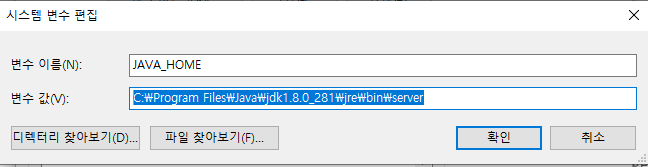

Java
 - JDK : (SDK) compiler -> java byte code 결과물 (abc.class)
 - JRE : 

#### 우분투

Install Java 1.8 or up

```
sudo apt-get install g++ openjdk-8-jdk curl
```

In [1]:
! java --version

Unrecognized option: --version
Error: Could not create the Java Virtual Machine.
Error: A fatal exception has occurred. Program will exit.


In [2]:
! python -V

Python 3.9.13


## 2. KoNLPy 설치


### - Python3.9, 2022/07 

Python 3.8, 3.9

Python3.9 에서 설치된 버전
 - JPype1-1.4.0 
 - konlpy-0.6.0
 - nltk 3.7
 - numpy==1.22.4

In [3]:
! pip install konlpy

## 1. 한국어 말뭉치 지원
* kolaw: 한국 법률 말뭉치 (constitution.txt)
* kobill: 대한민국 국회 의안 말뭉치 (1809890.txt ~ 1809899.txt)


In [4]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [5]:
ko_law = kolaw.open('constitution.txt').read()
print(ko_law[:500])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


In [6]:
from konlpy.corpus import kobill
print(kobill.fileids())

['1809890.txt', '1809891.txt', '1809892.txt', '1809893.txt', '1809894.txt', '1809895.txt', '1809896.txt', '1809897.txt', '1809898.txt', '1809899.txt']


In [7]:
doc_ko = kobill.open('1809897.txt').read()
print(doc_ko[:100])

국군부대의 아랍에미리트(UAE)군 교육훈련 지원 등에 
관한 파견 동의안

의안
                                                       


### 말뭉치 정리

1. https://corpus.korean.go.kr/
1. https://ilis.yonsei.ac.kr/corpus/#/
1. https://zetawiki.com/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%A7%90%EB%AD%89%EC%B9%98_%EB%AA%A8%EC%9D%8C

## 2. 형태소 분석 및 품사 태깅


한국어 형태소 분석기 프로젝트

http://konlpy-ko.readthedocs.io

프로젝트 | 이름 | 홈페이지
:---- | :---- | :----
한나눔 | Hannanum | http://kldp.net/hannanum/
꼬꼬마 | Kkma | http://kkma.snu.ac.kr/ 
코모란 | Komoran | http://www.shineware.co.kr/products/komoran/ 
은전한닢 | Mecab | https://bitbucket.org/eunjeon/mecab-ko/ 
트위터 | Okt | https://github.com/open-korean-text/open-korean-text

비교 http://konlpy.org/en/v0.4.4/morph/

각 클래스의 주요 메소드
* morphs : 형태소 추출
* nouns : 명사 추출
* pos : pos 태깅

### 한글 Token 생성

일정한 뜻을 가진 가장 작은 말의 단위로 토큰화 한다. 문장에서 단어를 검색해서 토큰을 추출한다. 토큰은 문장(sentence) 단위, 단어(word) 단위로 토큰화한다.

 - from nltk.tokenize import sent_tokenize # 문장으로 나누기
- from nltk.tokenize import word_tokenize # 단어로 나누기 
- from nltk.tokenize import regexp_tokenize # 정규식으로 나누기
- 한글 형태소 분석기 
   - `konlp.tag.[분석기].morphs()` 
   - `konlp.tag.[분석기].nouns()` 

In [8]:
doc_ko = kobill.open('1809897.txt').read()
print(doc_ko[:100])

국군부대의 아랍에미리트(UAE)군 교육훈련 지원 등에 
관한 파견 동의안

의안
                                                       


In [9]:
len(doc_ko)

4135

#### Tokenizing
 문장 -> 단어로

In [9]:
type(doc_ko)

str

In [11]:
doc_ko.split(' ')[:20]

['국군부대의',
 '아랍에미리트(UAE)군',
 '교육훈련',
 '지원',
 '등에',
 '\n관한',
 '파견',
 '동의안\n\n의안\n',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [12]:
import nltk

tokens_ko = nltk.regexp_tokenize(doc_ko, r'(\w+)')
tokens_ko

['국군부대의',
 '아랍에미리트',
 'UAE',
 '군',
 '교육훈련',
 '지원',
 '등에',
 '관한',
 '파견',
 '동의안',
 '의안',
 '제출연월일',
 '2010',
 '11',
 '15',
 '9897',
 '번호',
 '제',
 '출',
 '자',
 '정',
 '부',
 '제안이유',
 '가',
 'UAE측',
 '요청과',
 '협의에',
 '따라',
 '국익창출과',
 '다양한',
 '지역에서의',
 '우리',
 '특전부대',
 '임무수행능력',
 '향상',
 '등을',
 '목적으로',
 '국군부대를',
 'UAE에',
 '파견하려는',
 '것임',
 '나',
 '국군부대',
 '파견을',
 '계기로',
 '우리',
 '특전부대의',
 '전투력',
 '향상은',
 '물론',
 'UAE에',
 '대한',
 '방산수출협력',
 '확대',
 '국방운영체계',
 '수출',
 '예비역',
 '및',
 '민간',
 '전문인력',
 '진출',
 '양국간',
 '경제협력',
 '확대',
 '등이',
 '기대됨',
 '주요내용',
 '가',
 '국군부대의',
 '임무는',
 'UAE군',
 '특수전',
 '부대에',
 '대한',
 '교육훈련',
 '지원',
 'UAE군',
 '특수전',
 '부대와',
 '연합훈련',
 '및',
 '연습',
 '유사시',
 '우리',
 '국민',
 '보호임',
 '나',
 '파견규모는',
 '150명',
 '이내이며',
 '파견지역은',
 'UAE',
 '아부다비주',
 '알아인',
 '소재',
 '특수전학교임',
 '다',
 '파견기간은',
 '2011년',
 '1월',
 '1일부터',
 '2012년',
 '12월',
 '31일까지임',
 '라',
 '부대',
 '지휘권은',
 '한국군이',
 '보유하며',
 '우리',
 '합동참모의장이',
 '작전지휘함',
 '마',
 '국군부대의',
 '파견경비는',
 '우리',
 '정부의',
 '부담으로',
 '함',
 '참고사항',
 '가',
 '관련법령',
 '헌법',
 

In [13]:
nltk.word_tokenize(doc_ko)

['국군부대의',
 '아랍에미리트',
 '(',
 'UAE',
 ')',
 '군',
 '교육훈련',
 '지원',
 '등에',
 '관한',
 '파견',
 '동의안',
 '의안',
 '제출연월일',
 ':',
 '2010',
 '.',
 '11',
 '.',
 '15',
 '.',
 '9897',
 '번호',
 '제',
 '출',
 '자',
 ':',
 '정',
 '부',
 '제안이유',
 '가.',
 'UAE측',
 '요청과',
 '협의에',
 '따라',
 ',',
 '국익창출과',
 '다양한',
 '지역에서의',
 '우리',
 '특전부대',
 '임무수행능력',
 '향상',
 '등을',
 '목적으로',
 '국군부대를',
 'UAE에',
 '파견하려는',
 '것임',
 '.',
 '나',
 '.',
 '국군부대',
 '파견을',
 '계기로',
 '우리',
 '특전부대의',
 '전투력',
 '향상은',
 '물론',
 ',',
 'UAE에',
 '대한',
 '방산수출협력',
 '확대',
 ',',
 '국방운영체계',
 '수출',
 ',',
 '예비역',
 '및',
 '민간',
 '전문인력',
 '진출',
 ',',
 '양국간',
 '경제협력',
 '확대',
 '등이',
 '기대됨',
 '.',
 '주요내용',
 '가',
 '.',
 '국군부대의',
 '임무는',
 'UAE군',
 '특수전',
 '부대에',
 '대한',
 '교육훈련',
 '지원',
 ',',
 'UAE군',
 '특수전',
 '부대와',
 '연합훈련',
 '및',
 '연습',
 ',',
 '유사시',
 '우리',
 '국민',
 '보호임',
 '.',
 '나',
 '.',
 '파견규모는',
 '150명',
 '이내이며',
 ',',
 '파견지역은',
 'UAE',
 '아부다비주',
 '알아인',
 '소재',
 '특수전학교임',
 '.',
 '다',
 '.',
 '파견기간은',
 '2011년',
 '1월',
 '1일부터',
 '2012년',
 '12월',
 '31일까지임',
 '.',
 '라',
 '.',


In [17]:
from konlpy.tag import Kkma, Komoran, Okt

# - nouns()
# - morphs()

In [18]:
okt = Okt()
okt.nouns(doc_ko)  # 한글 형태소 -> 한글 단어!!

['국군',
 '부대',
 '아랍에미리트',
 '군',
 '교육',
 '훈련',
 '지원',
 '등',
 '관',
 '파견',
 '의안',
 '의안',
 '제출',
 '연월일',
 '번호',
 '제',
 '자',
 '정',
 '부',
 '제안',
 '이유',
 '요청',
 '협의',
 '국익',
 '창',
 '지역',
 '우리',
 '특',
 '부대',
 '임무',
 '수행',
 '능력',
 '향상',
 '등',
 '목적',
 '국군',
 '부대',
 '파견',
 '것임',
 '나',
 '국군',
 '부대',
 '파견',
 '계기',
 '우리',
 '특',
 '부대',
 '전투력',
 '향상',
 '대한',
 '방산수',
 '협력',
 '확대',
 '국방',
 '운영체계',
 '수출',
 '예비역',
 '및',
 '민간',
 '전문',
 '인력',
 '진출',
 '양국',
 '경제',
 '협력',
 '확대',
 '등',
 '기대',
 '내용',
 '국군',
 '부대',
 '임무',
 '군',
 '특수전',
 '부대',
 '대한',
 '교육',
 '훈련',
 '지원',
 '군',
 '특수전',
 '부대',
 '연합',
 '훈련',
 '및',
 '연습',
 '유사시',
 '우리',
 '국민',
 '보호',
 '임',
 '나',
 '파견',
 '규모',
 '명',
 '이내',
 '파견',
 '지역',
 '아부다비',
 '주',
 '알아인',
 '소재',
 '특수전',
 '학교',
 '임',
 '파견',
 '기간',
 '부대',
 '지휘',
 '한국',
 '보유',
 '우리',
 '합동',
 '참모',
 '의장',
 '작전',
 '마',
 '국군',
 '부대',
 '파견',
 '경비',
 '우리',
 '정부',
 '부담',
 '함',
 '참고',
 '사항',
 '관련',
 '법령',
 '헌법',
 '제',
 '제',
 '항',
 '나',
 '예산',
 '조치',
 '국회',
 '동의',
 '후',
 '예산안',
 '대한',
 '국회',
 '심의',
 '과정',
 '반

In [16]:
okt.morphs(doc_ko)

['국군',
 '부대',
 '의',
 '아랍에미리트',
 '(',
 'UAE',
 ')',
 '군',
 '교육',
 '훈련',
 '지원',
 '등',
 '에',
 '관',
 '한',
 '파견',
 '동',
 '의안',
 '\n\n',
 '의안',
 '\n                                                                  ',
 '제출',
 '연월일',
 ':',
 '2010',
 '.',
 '11',
 '.',
 '15',
 '.',
 '\n',
 '9897',
 '\n',
 '번호',
 '\n                                                                        ',
 '제',
 '출',
 '자',
 ':',
 '정',
 '부',
 '\n\n',
 '제안',
 '이유',
 '\n\n    ',
 '가',
 '.',
 'UAE',
 '측',
 '요청',
 '과',
 '협의',
 '에',
 '따라',
 ',',
 '국익',
 '창',
 '출과',
 '다양한',
 '지역',
 '에서의',
 '우리',
 '특',
 '전',
 '부대',
 '임무',
 '수행',
 '능력',
 '향상',
 '등',
 '을',
 '목적',
 '으로',
 '국군',
 '부대',
 '를',
 'UAE',
 '에',
 '파견',
 '하려는',
 '것임',
 '.',
 '\n\n    ',
 '나',
 '.',
 '국군',
 '부대',
 '파견',
 '을',
 '계기',
 '로',
 '우리',
 '특',
 '전',
 '부대',
 '의',
 '전투력',
 '향상',
 '은',
 '물론',
 ',',
 'UAE',
 '에',
 '대한',
 '방산수',
 '출',
 '협력',
 '확대',
 ',',
 '국방',
 '운영체계',
 '수출',
 ',',
 '예비역',
 '및',
 '민간',
 '전문',
 '인력',
 '진출',
 ',',
 '양국',
 '간',
 '경제',
 '협력',
 '확대',

### 한국어 형태소 분석

- 한글 형태소 분석기 
   - `konlp.tag.[분석기].morphs()` 
   - `konlp.tag.[분석기].nouns()` 

In [19]:
from konlpy.tag import Kkma, Komoran, Okt

In [20]:
morphs = Okt().morphs('아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

['아버지', '가', '방', '에', '들어가신다', '.', '그', '방', '에는', '내', '동생', '이', '있다', '.']

In [21]:
morphs = Okt().morphs('아버지가방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

['아버지', '가방', '에', '들어가신다', '.', '그', '방', '에는', '내', '동생', '이', '있다', '.']

In [22]:
morphs = Kkma().morphs('아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

['아버지',
 '가',
 '방',
 '에',
 '들어가',
 '시',
 'ㄴ다',
 '.',
 '그',
 '방',
 '에',
 '는',
 '내',
 '동생',
 '이',
 '있',
 '다',
 '.']

In [23]:
morphs = Kkma().morphs('아버지가방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

['아버지',
 '가방',
 '에',
 '들어가',
 '시',
 'ㄴ다',
 '.',
 '그',
 '방',
 '에',
 '는',
 '내',
 '동생',
 '이',
 '있',
 '다',
 '.']

In [24]:
morphs = Hannanum().morphs('아버지가 방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

NameError: name 'Hannanum' is not defined

In [ ]:
morphs = Hannanum().morphs('아버지가방에 들어가신다. 그 방에는 내 동생이 있다.')
morphs

In [27]:
nltk.regexp_tokenize('아버지가방에들어가신다. 그방에는내동생이있다.', r'(\w+)')

['아버지가방에들어가신다', '그방에는내동생이있다']

In [28]:
Okt().nouns('아버지가방에들어가신다. 그방에는내동생이있다.')

['아버지', '가방', '방', '동생']

### 한국어 품사 태깅

텍스트를 태그하는 길은 여러가지 있다. 아주 자주 사용하는 것으로 POS 태깅이 있다. 

형태소 분석기의 `.pos()` 함수는  사용해서 행태소의 품사를 얻어서 **(<형태소>,<품사>)** 튜플 리스트를 반환한다.


In [29]:
Kkma().sentences('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')  # 문단단

['자연어처리 (NLP) 가 한국어에서 특히 어려운 4가지 이유! 왜?']

In [30]:
Kkma().sentences(doc_ko)

['국군부대의 아랍에 미리트 (UAE) 군 교육훈련 지원 등에 관한 파견 동의 안 의안 제출 연월일 : 2010. 11. 15. 9897 번호 제 출 자 : 정 부 제안 이유 가. UAE 측 요청과 협의에 따라, 국익 창출과 다양한 지역에서의 우리 특전부대 임무수행능력 향상 등을 목적으로 국군부대를 UAE에 파견하려는 것임. 나. 국군부대 파견을 계기로 우리 특전부대의 전투력 향상은 물론, UAE에 대한 방산 수출협력 확대, 국방운영체계 수출, 예비역 및 민간 전문인력 진출, 양국 간 경제협력 확대 등이 기대됨. 주요 내용 가. 국군부대의 임무는 UAE 군 특수 전 부대에 대한 교육훈련 지원, UAE 군 특수 전 부대와 연합훈련 및 연습, 유사시 우리 국민 보호 임. 나. 파견 규모는 150명 이내이며, 파견지역은 UAE 아부 다비주 알아 인 소재 특수 전학교 임. 다.',
 '파견기간은 2011년 1월 1일부터 2012년 12월 31일까지 임. 라.',
 '부대 지휘권은 한국군이 보유하며 우리 합동 참모의장이 작전 지휘함. 마. 국군부대의 파견경비는 우리 정부의 부담으로 함. 참고 사항 가. 관련 법령 : 헌법 제 60조 제 2 항 나. 예산조치 : 국회 동의 후 2011년도 예산안에 대한 국회 심의 과정 에서 반영 추진 다. 합 의 : 외교통 상부, 기획 재정부와 합의되었음. - 1 - \x0c 국 군부대의 아랍에 미리트 (UAE) 군 교육훈련 지원 등에 관한 파견 동의 안 UAE 군 교육훈련 지원 등을 위해 150명 이내의 국군부대를 2011년 1월 1일부터 2012년 12월 31일까지 2년 간 UAE에 파견하는 것을 헌법 제 60조 제 2 항의 규정에 따라 동의한다.',
 '- 3 - \x0c1. 국군부대 파견 목적 및 경과 가. 파견목적 UAE 측 요청과 협의에 따라, 국익 창출과 다양한 지역에서의 우리 특전부대 임무수행능력 향상 등을 목적으로 국군부대를 UAE에 파견하려는 것임. 나. 파견 경위 및 경과 ○ ’09. 12 한 -UAE 관계가 ‘ 포괄

In [ ]:
Kkma().nouns('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [3]:
Kkma().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

[('자연어', 'NNG'),
 ('처리', 'NNG'),
 ('(', 'SS'),
 ('NLP', 'OL'),
 (')', 'SS'),
 ('가', 'VV'),
 ('아', 'ECS'),
 ('한국어', 'NNG'),
 ('에서', 'JKM'),
 ('특히', 'MAG'),
 ('어렵', 'VA'),
 ('ㄴ', 'ETD'),
 ('4', 'NR'),
 ('가지', 'NNM'),
 ('이유', 'NNG'),
 ('!', 'SF'),
 ('왜', 'MAG'),
 ('?', 'SF')]

In [ ]:
Kkma().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Hannanum().nouns('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Hannanum().morphs('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Hannanum().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Okt().nouns('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Okt().morphs('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

In [ ]:
Okt().pos('자연어처리(NLP)가 한국어에서 특히 어려운 4가지 이유! 왜?')

Kkam().sentence(), Kkma.nouns(), Kkma().morphs()
 - 한글 형태소/명사/문단
 
nltk.regexp_tokenize()
 - 한글/영문 단어 추출
 
String.split(Delimiter)
 - 한글/영문 delimiter 이용 분리

###  `nltk.Text()` 활용


[nltk.text.Text](http://www.nltk.org/api/nltk.html#nltk.text.Text) 에서 제공하는 API 를 사용해 보자. 텍스트를 토큰으로 래핑해주는 기능이며 여러 메서드 (couting, concordanceing, collocation discovery...)는 분석의 다양성을 제공한다.

- [class nltk.text.Text(tokens, name=None)](https://www.nltk.org/api/nltk.html?highlight=nltk%20text#nltk.text.Text) 

들여온 문서는`nltk.Text()`는 문서 하나를 편리하게 탐색하도록 태그를 생성해 준다. 

In [31]:
import nltk

In [32]:
doc_ko = kobill.open('1809897.txt').read()
tokens_ko = nltk.regexp_tokenize(doc_ko, r'(\w+)')
tokens_ko

['국군부대의',
 '아랍에미리트',
 'UAE',
 '군',
 '교육훈련',
 '지원',
 '등에',
 '관한',
 '파견',
 '동의안',
 '의안',
 '제출연월일',
 '2010',
 '11',
 '15',
 '9897',
 '번호',
 '제',
 '출',
 '자',
 '정',
 '부',
 '제안이유',
 '가',
 'UAE측',
 '요청과',
 '협의에',
 '따라',
 '국익창출과',
 '다양한',
 '지역에서의',
 '우리',
 '특전부대',
 '임무수행능력',
 '향상',
 '등을',
 '목적으로',
 '국군부대를',
 'UAE에',
 '파견하려는',
 '것임',
 '나',
 '국군부대',
 '파견을',
 '계기로',
 '우리',
 '특전부대의',
 '전투력',
 '향상은',
 '물론',
 'UAE에',
 '대한',
 '방산수출협력',
 '확대',
 '국방운영체계',
 '수출',
 '예비역',
 '및',
 '민간',
 '전문인력',
 '진출',
 '양국간',
 '경제협력',
 '확대',
 '등이',
 '기대됨',
 '주요내용',
 '가',
 '국군부대의',
 '임무는',
 'UAE군',
 '특수전',
 '부대에',
 '대한',
 '교육훈련',
 '지원',
 'UAE군',
 '특수전',
 '부대와',
 '연합훈련',
 '및',
 '연습',
 '유사시',
 '우리',
 '국민',
 '보호임',
 '나',
 '파견규모는',
 '150명',
 '이내이며',
 '파견지역은',
 'UAE',
 '아부다비주',
 '알아인',
 '소재',
 '특수전학교임',
 '다',
 '파견기간은',
 '2011년',
 '1월',
 '1일부터',
 '2012년',
 '12월',
 '31일까지임',
 '라',
 '부대',
 '지휘권은',
 '한국군이',
 '보유하며',
 '우리',
 '합동참모의장이',
 '작전지휘함',
 '마',
 '국군부대의',
 '파견경비는',
 '우리',
 '정부의',
 '부담으로',
 '함',
 '참고사항',
 '가',
 '관련법령',
 '헌법',
 

In [12]:
tokens_ko[:10]

['국군부대의', '아랍에미리트', 'UAE', '군', '교육훈련', '지원', '등에', '관한', '파견', '동의안']

In [36]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809897호')

In [14]:
type(ko)

nltk.text.Text

In [15]:
ko.tokens

['국군부대의',
 '아랍에미리트',
 'UAE',
 '군',
 '교육훈련',
 '지원',
 '등에',
 '관한',
 '파견',
 '동의안',
 '의안',
 '제출연월일',
 '2010',
 '11',
 '15',
 '9897',
 '번호',
 '제',
 '출',
 '자',
 '정',
 '부',
 '제안이유',
 '가',
 'UAE측',
 '요청과',
 '협의에',
 '따라',
 '국익창출과',
 '다양한',
 '지역에서의',
 '우리',
 '특전부대',
 '임무수행능력',
 '향상',
 '등을',
 '목적으로',
 '국군부대를',
 'UAE에',
 '파견하려는',
 '것임',
 '나',
 '국군부대',
 '파견을',
 '계기로',
 '우리',
 '특전부대의',
 '전투력',
 '향상은',
 '물론',
 'UAE에',
 '대한',
 '방산수출협력',
 '확대',
 '국방운영체계',
 '수출',
 '예비역',
 '및',
 '민간',
 '전문인력',
 '진출',
 '양국간',
 '경제협력',
 '확대',
 '등이',
 '기대됨',
 '주요내용',
 '가',
 '국군부대의',
 '임무는',
 'UAE군',
 '특수전',
 '부대에',
 '대한',
 '교육훈련',
 '지원',
 'UAE군',
 '특수전',
 '부대와',
 '연합훈련',
 '및',
 '연습',
 '유사시',
 '우리',
 '국민',
 '보호임',
 '나',
 '파견규모는',
 '150명',
 '이내이며',
 '파견지역은',
 'UAE',
 '아부다비주',
 '알아인',
 '소재',
 '특수전학교임',
 '다',
 '파견기간은',
 '2011년',
 '1월',
 '1일부터',
 '2012년',
 '12월',
 '31일까지임',
 '라',
 '부대',
 '지휘권은',
 '한국군이',
 '보유하며',
 '우리',
 '합동참모의장이',
 '작전지휘함',
 '마',
 '국군부대의',
 '파견경비는',
 '우리',
 '정부의',
 '부담으로',
 '함',
 '참고사항',
 '가',
 '관련법령',
 '헌법',
 

#### 빈도분포 `.vocab()`

`.vocab()` 은 토큰의 **빈도분포(frequency distribution)**를 반환해 준다.

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
ko.vocab()

FreqDist({'파견': 14, 'UAE': 12, '지원': 12, '교육훈련': 11, '및': 10, '2': 10, '국군부대의': 9, '우리': 9, '가': 8, '나': 8, ...})

C:\Users\SBAUser\.venv\Second_day\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBAUser\.venv\Second_day\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44204 (\N{HANGUL SYLLABLE GYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBAUser\.venv\Second_day\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBAUser\.venv\Second_day\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SBAUser\.venv\Second_day\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_fi

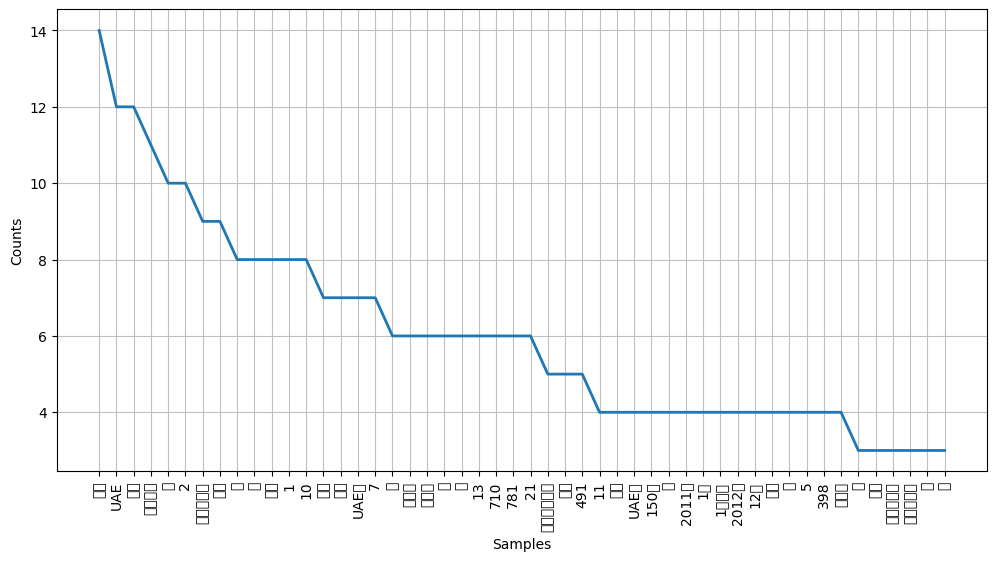

In [38]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

필터링...

단어와 일치하는 토큰수..

In [39]:
ko.count('교육')

2

In [40]:
ko.count('지원')

12

분산(Dispersion) 플롯

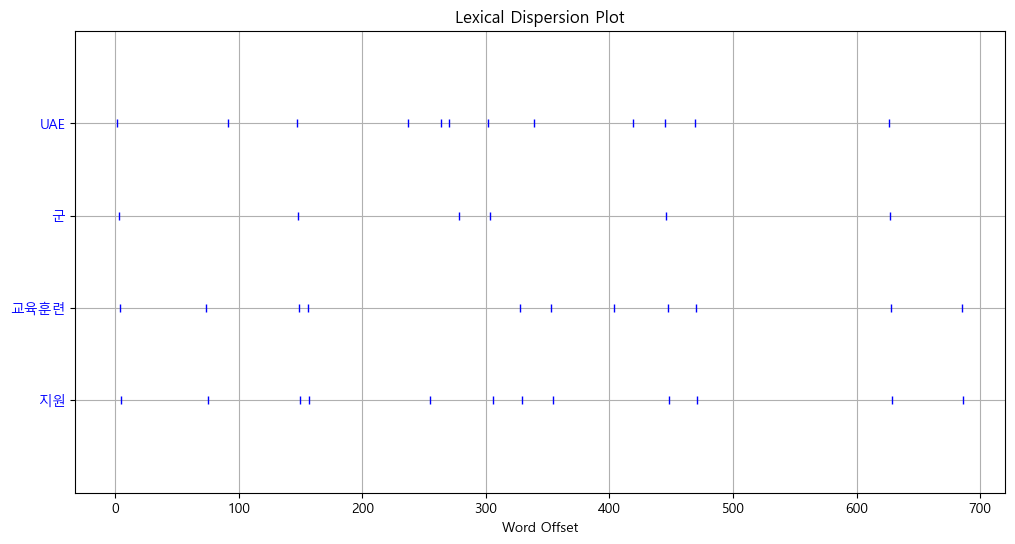

In [43]:
plt.figure(figsize=(12,6))
ko.dispersion_plot([ 'UAE', '군', '교육훈련', '지원' ])

#### 일치(Concordance)

토큰에서 일치하는 부분을 출력한다.

In [ ]:
ko.concordance('UAE', lines=5)

### 유사 단어 찾기

[text.Text.similar()](https://www.nltk.org/api/nltk.html?highlight=nltk%20text#nltk.text.Text.similar)는 분포 유사성에 따라 단어를 찾는다.

In [44]:
ko.similar('부대')

동의안


In [45]:
ko.collocations()

1일부터 2012년; 2012년 12월; 국군부대의 아랍에미리트; 아랍에미리트 UAE; 748 6350; 12월 31일까지;
UAE군 특수전; UAE측 요청과; 국익창출과 다양한; 다양한 지역에서의; 요청과 협의에; 유재익 연락처; 정부의 부담으로;
지휘권은 한국군이; 특전부대 임무수행능력; 2011년도 예산안에; 국방부 국제평화협력과장; 목적으로 국군부대를; UAE에
파견하려는; 특수전 부대에


---

## 요약

* KoNLPy 코퍼스
* 한글 형태소 분석
* 한글 단어 토큰
* NLTK Text
* PoS Tagging


# 빈도 분석 응용

## 영문 빈도분석

In [46]:
from nltk.corpus import stopwords

In [47]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [49]:
mydoc = None
with open('../data/트럼프취임연설문.txt', 'r', encoding='euc-kr') as f:
# with open(path, 'r', encoding='cp949') as f:
    mydoc = f.read()
    
mydoc[:100]

' Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow'

In [50]:
len(mydoc)

8294

In [ ]:
 # noltk.regexp_tokenize(doc_ko, r'(\w+)')

In [51]:
tokenizer = nltk.tokenize.RegexpTokenizer('[\w]+')

In [52]:
words = mydoc.lower()
tokens = tokenizer.tokenize(words)

In [53]:
tokens[:200]

['chief',
 'justice',
 'roberts',
 'president',
 'carter',
 'president',
 'clinton',
 'president',
 'bush',
 'president',
 'obama',
 'fellow',
 'americans',
 'and',
 'people',
 'of',
 'the',
 'world',
 'thank',
 'you',
 'we',
 'the',
 'citizens',
 'of',
 'america',
 'are',
 'now',
 'joined',
 'in',
 'a',
 'great',
 'national',
 'effort',
 'to',
 'rebuild',
 'our',
 'country',
 'and',
 'restore',
 'its',
 'promise',
 'for',
 'all',
 'of',
 'our',
 'people',
 'together',
 'we',
 'will',
 'determine',
 'the',
 'course',
 'of',
 'america',
 'and',
 'the',
 'world',
 'for',
 'many',
 'many',
 'years',
 'to',
 'come',
 'we',
 'will',
 'face',
 'challenges',
 'we',
 'will',
 'confront',
 'hardships',
 'but',
 'we',
 'will',
 'get',
 'the',
 'job',
 'done',
 'every',
 'four',
 'years',
 'we',
 'gather',
 'on',
 'these',
 'steps',
 'to',
 'carry',
 'out',
 'the',
 'orderly',
 'and',
 'peaceful',
 'transfer',
 'of',
 'power',
 'and',
 'we',
 'are',
 'grateful',
 'to',
 'president',
 'obama',
 'a

In [57]:
len(tokens)

1452

### NLTK 영문 불용어

In [55]:
stop_words = stopwords.words('english')

In [56]:
stopped_tokens = [word for word in list(tokens) if not word in stop_words]

In [58]:
stopped_tokens2 = [word for word in stopped_tokens if len(word) > 1]

### pandas 이용 빈도

In [59]:
import pandas as pd
myseries = pd.Series(stopped_tokens2).value_counts()
myseries.head(10)

america     20
american    11
people      10
country      9
one          8
nation       7
every        7
world        6
never        6
new          6
dtype: int64

In [61]:
mydic = dict(myseries)

In [62]:
mydic

{'america': 20,
 'american': 11,
 'people': 10,
 'country': 9,
 'one': 8,
 'nation': 7,
 'every': 7,
 'world': 6,
 'never': 6,
 'new': 6,
 'back': 6,
 'great': 6,
 'god': 5,
 'protected': 5,
 'right': 5,
 'across': 5,
 'make': 5,
 'today': 5,
 'president': 5,
 'dreams': 5,
 'many': 5,
 'wealth': 4,
 'heart': 4,
 'first': 4,
 'together': 4,
 'thank': 4,
 'bring': 4,
 'americans': 4,
 'citizens': 4,
 'day': 4,
 'everyone': 4,
 'power': 4,
 'united': 3,
 'factories': 3,
 'left': 3,
 'jobs': 3,
 'foreign': 3,
 'families': 3,
 'government': 3,
 'whether': 3,
 'borders': 3,
 'nations': 3,
 'millions': 3,
 'bless': 3,
 'countries': 3,
 'must': 3,
 'obama': 3,
 'pain': 2,
 'made': 2,
 'always': 2,
 'moment': 2,
 'let': 2,
 'land': 2,
 'allegiance': 2,
 'years': 2,
 'us': 2,
 'capital': 2,
 'strength': 2,
 'triumphs': 2,
 'victories': 2,
 'action': 2,
 'exists': 2,
 'earth': 2,
 'trillions': 2,
 'oath': 2,
 'movement': 2,
 'national': 2,
 'states': 2,
 'truly': 2,
 'loyalty': 2,
 'winning': 2,


In [60]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

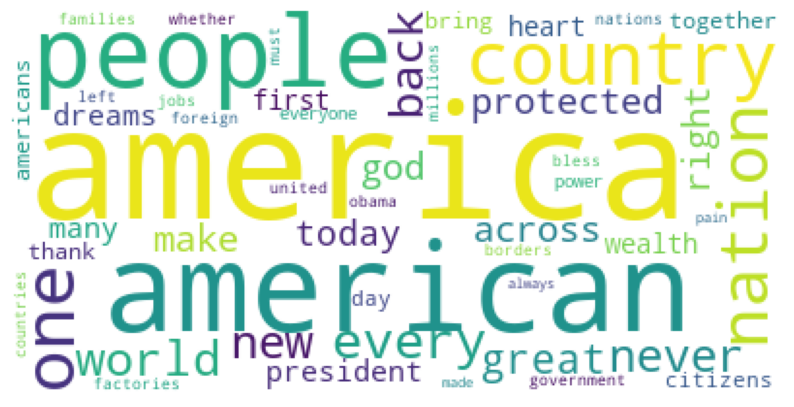

In [65]:
wc = WordCloud(background_color="white", random_state=0)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate_from_frequencies(dict(myseries[:50])))
plt.axis("off")
plt.show()

>

>

## 한글 빈도분석

In [66]:
path = '../data/문재인대통령취임연설문.txt'
mydoc = None
with open(path, 'r', encoding='euckr') as f:
    mydoc = f.read()
    
mydoc[:100]

'존경하고 사랑하는 국민 여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 '

## 한글 불용어


한국어 같은 경우는 토큰화 단계에서 조사나, 접속사를 제거하면 됨으로 따로 정해진 불용어가 없다.

필요없는 명사나 형용사를 제거하고자 할 때 아래 코드와 같이 직접 불용어 리스트를 정의한 다음 한국어 불용어를 제거한다.


In [ ]:
# 샘플
words = ['소설', '시', '인문', '역사', '예술', '종교', '사회', '과학','경제 경영', '자기계발', '만화', '여행', '잡지',
        '어린이', '청소년','유아', '요리','육아', '가정 살림', '건강 취미', '대학교재','국어와 외국어', 'IT 모바일',
        '수험서 자격증', '초등참고서', '중고등참고서']   #yes24.com의 Category

In [ ]:
stopwords = ['유아', '청소년', '어린이', '육아', '성인', '19금']

In [ ]:
[word for word in words if word not in stopwords]

### 불용어 파일 사용

 - ex: https://www.ranks.nl/stopwords/korean

In [71]:
ko_text = open('../data/문재인대통령취임연설문.txt', encoding='euc-kr').read()

In [72]:
ko_stops = open('../data/한글불용샘플.txt', encoding='utf-8').read()

In [73]:
ko_text

'존경하고 사랑하는 국민 여러분. 감사합니다. 국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제 19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.\n우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제 19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.\n함께 선거를 치른 후보들께 감사의 말씀과 함께 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.\n존경하는 국민 여러분, 지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복으로 승화시켜 마침내 오늘 새로운 세상을 열었습니다. 대한민국의 위대함은 국민의 위대함입니다. 그리고 이번 대통령 선거에서 우리 국민들은 또 하나의 역사를 만들어주셨습니다. 전국 각지에서 골고른 지지로 새로운 대통령을 선택해주셨습니다.\n오늘부터 저는 국민 모두의 대통령이 되겠습니다. 저를 지지하지 않았던 국민 한분한분도 저의 국민이고, 우리의 국민으로 섬기겠습니다. 저는 감히 약속드립니다. 2017년 5월 10일 이날은 진정한 국민 통합이 시작된 날로 역사에 기록될 것입니다.\n존경하고

In [75]:
word_tokens = nltk.word_tokenize(ko_text)
# Kkma.nouns(), .morphs()

In [89]:
word_ko = Kkma().nouns(ko_text)

In [90]:
len(word_ko)

299

In [75]:
stop_words = ko_stops.split(' ')

In [91]:
word_ko = ko_stops.split(' ')

In [ ]:
# ko_list = [] 
# for w in word_tokens: 
#     if w not in stop_words: 
#         ko_list.append(w) 

In [76]:
len(word_tokens)

741

In [77]:
# 불용어 제거
ko_tokens = [each_word for each_word in word_tokens if each_word not in stop_words]

In [78]:
len(ko_tokens)

583

In [79]:
ko_tokens = [word for word in ko_tokens if len(word) > 1]   #1글자 제외

In [80]:
len(ko_tokens)

581

In [83]:
wc = WordCloud(font_path= "C:/Windows/Fonts/Malgun.ttf",
               background_color='white', max_words=2000)
              # stopwords = stop_words)
# wc = wc.generate(ko_list) # array-like
wc = wc.generate(str(ko_tokens))
wc.words_

{"국민'": 1.0,
 "대통령이' 되겠습니다'": 1.0,
 "새로운'": 0.6363636363636364,
 "대통령'": 0.5454545454545454,
 "것입니다'": 0.5454545454545454,
 "저는'": 0.45454545454545453,
 "세상을'": 0.45454545454545453,
 "위해'": 0.45454545454545453,
 "대통령의'": 0.45454545454545453,
 "대통령이'": 0.45454545454545453,
 "만들겠습니다'": 0.45454545454545453,
 "대한민국'": 0.2727272727272727,
 "대한민국을'": 0.2727272727272727,
 "나라를'": 0.2727272727272727,
 "합니다'": 0.2727272727272727,
 "국민들은'": 0.2727272727272727,
 "광화문'": 0.2727272727272727,
 "국민과'": 0.2727272727272727,
 "소통하는'": 0.2727272727272727,
 "않겠습니다'": 0.2727272727272727,
 "존경하고'": 0.18181818181818182,
 "사랑하는'": 0.18181818181818182,
 "여러분의'": 0.18181818181818182,
 "오늘'": 0.18181818181818182,
 "19대'": 0.18181818181818182,
 "있습니다'": 0.18181818181818182,
 "우리의'": 0.18181818181818182,
 "나라입니다'": 0.18181818181818182,
 "했던'": 0.18181818181818182,
 "마음으로'": 0.18181818181818182,
 "선거를'": 0.18181818181818182,
 "우리는'": 0.18181818181818182,
 "동반자입니다'": 0.18181818181818182,
 "존경하는'": 0.1818181818181818

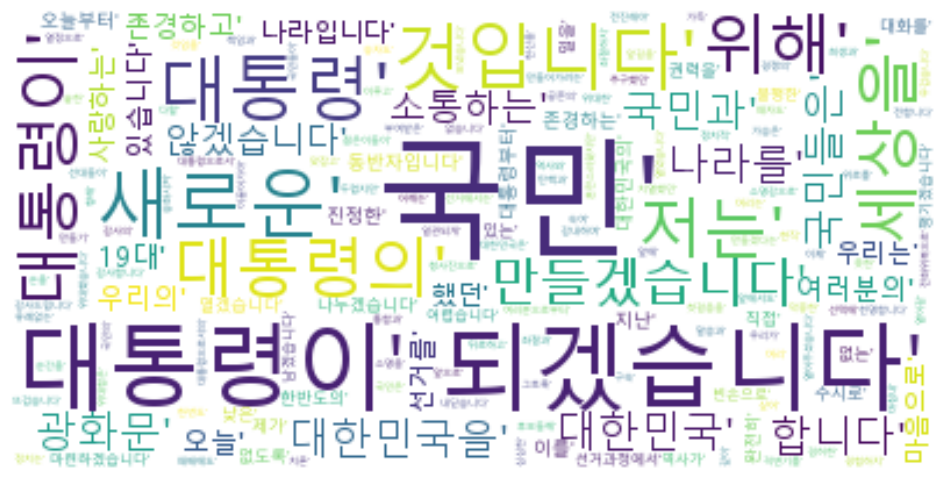

In [84]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### nltk.Text 이용

In [ ]:
ko_nouns = Okt().nouns(ko_text)

In [ ]:
len(ko_nouns)

In [ ]:
# 불용어 제거
ko_tokens = [word for word in ko_nouns if word not in stop_words]

In [ ]:
len(ko_tokens)

In [ ]:
ko_tokens = [word for word in ko_tokens if len(word) > 1]   #1글자 제외

In [ ]:
len(ko_tokens)

In [ ]:
# nltk.Text 이용
import nltk
kotext = nltk.Text(ko_nouns)

In [ ]:
kodic = kotext.vocab().most_common(100)

In [ ]:
# font_path = '~/Library/Fonts/NanumGothic.otf'
font_path= "C:/Windows/Fonts/NanumGothic.ttf"

wordcloud = WordCloud(font_path=font_path,
                      relative_scaling = 0.2,
                      background_color='white')

wordcloud = wordcloud.generate_from_frequencies(dict(kodic))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Naver 뉴스검색 빈도분석

In [114]:
import requests
from bs4 import BeautifulSoup

# url = 'https://search.naver.com/search.naver?query=삼성전자'
url = 'https://search.naver.com/search.naver?where=news&query=전장연'
headers = {'user-agent': 'Mozilla/5.0'}
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text)
[s.extract() for s in soup('script')]

[<script type="text/javascript"> if (!String.prototype.trim) { String.prototype.trim = function () { return this.replace(/^[\s\uFEFF\xA0]+|[\s\uFEFF\xA0]+$/g, ''); }; } if (!Array.prototype.indexOf) { Array.prototype.indexOf = function(searchElement, fromIndex) { var k; if (this == null) { throw new TypeError('"this" is null or not defined'); } var o = Object(this); var len = o.length >>> 0; if (len === 0) { return -1; } var n = fromIndex | 0; if (n >= len) { return -1; } k = Math.max(n >= 0 ? n : len - Math.abs(n), 0); while (k < len) { if (k in o && o[k] === searchElement) { return k; } k++; } return -1; }; } if (!Array.prototype.filter) { Array.prototype.filter = function(func, thisArg) { 'use strict'; if (!((typeof func === 'Function' || typeof func === 'function') && this)) throw new TypeError(); var len = this.length >>> 0, res = new Array(len), t = this, c = 0, i = -1; var kValue; if (thisArg === undefined) { while (++i !== len) { if (i in this) { kValue = t[i]; if (func(t[i], i

### pandas 이용 빈도분석

In [115]:
from konlpy.tag import Okt, Kkma

news_nouns = Kkma().nouns(soup.text)
news_nouns[:20]

['전장',
 '전장연',
 '연',
 '네이버',
 '뉴스',
 '뉴스검색',
 '검색',
 '메뉴',
 '영역',
 '가기',
 '본문',
 '한글',
 '입력',
 '입력기',
 '기',
 '자동',
 '자동완성',
 '완성',
 '레이어',
 '최근']

In [ ]:
# news_nouns = Okt().nouns(soup.text)
# news_nouns[:20]

In [116]:
# 불용어 제거
news_tokens = [word for word in news_nouns if word not in stop_words]

In [117]:
len(news_tokens)

473

In [118]:
news_tokens = [word for word in news_tokens if len(word) > 1]   #1글자 제외

In [119]:
len(news_tokens)

421

In [120]:
import pandas as pd
dataseries = pd.Series(news_tokens).value_counts()
dataseries.head(10)

열차         2
전장         1
권리         1
15         1
선정15시간     1
서울경제언론사    1
한국경제언론사    1
한국         1
요구         1
예산         1
dtype: int64

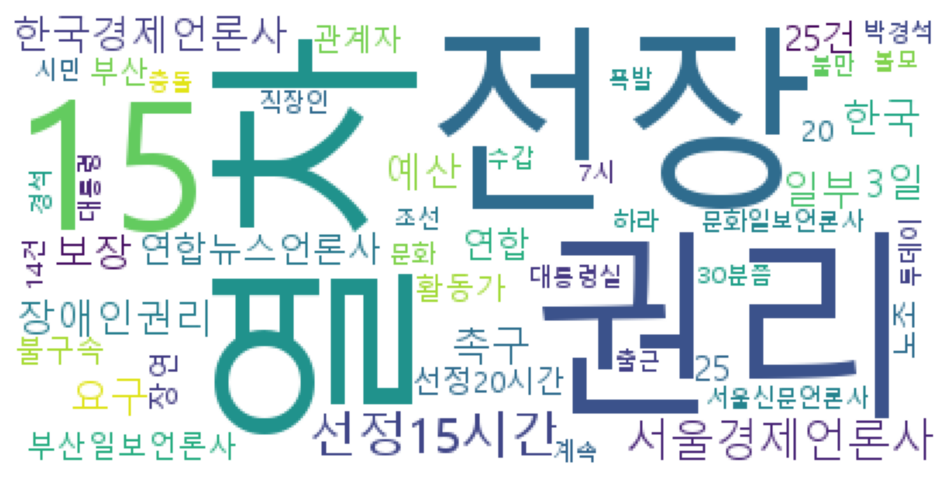

In [121]:
# font_path = '~/Library/Fonts/NanumGothic.otf'
font_path= "C:/Windows/Fonts/Malgun.ttf"

wordcloud = WordCloud(font_path=font_path,
                      relative_scaling = 0.2,
                      background_color='white')

wordcloud = wordcloud.generate_from_frequencies(dict(dataseries[:50]))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()